In [5]:
!pip install scikit-learn==0.24.2 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-multimodal 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-tabular 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
imbalanced-learn 0.12.3 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which 

In [6]:
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 2.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-common 1.1.1 requires pandas<2.3.0,>=2.0.0, but you have pandas 1.5.3 which is incompatible.
autogluon-core 1.1.1 requires pandas<2.3.0,>=2.0.0, but you have pandas 1.5.3 which is incompatible.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-features 1.1.1 requires pandas<2.3.0,>=2.0.0, but you have pandas 1.5.3 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-multimodal 1.1.1 requires pandas<2.

In [1]:
import pandas as pd
print(pd.__version__)

1.5.3


In [2]:
import autosklearn

In [3]:
import autosklearn.classification as classifier
from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)

In [4]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


df=pd.read_csv("adult.csv")
df = df.dropna(subset=['income'])  # Remove rows with missing prices

X= df.drop(["income"], axis=1)
y= df["income"]

# One-Hot Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

X = preprocessor.fit_transform(X)

#label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)



#trainingstime max 4h

automl = AutoSklearn2Classifier(
    time_left_for_this_task= 14400,
    per_run_time_limit= 600,
    n_jobs = 8,
    memory_limit=8192 
)

In [5]:
automl.fit(X_train, y_train, dataset_name="income")

/usr/local/lib/python3.8/dist-packages/autosklearn/experimental/selector.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in prediction.iteritems():


AutoSklearn2Classifier(memory_limit=8192, metric=accuracy, n_jobs=8,
                       per_run_time_limit=600, time_left_for_this_task=14400)

In [12]:
import sklearn.metrics as skm
from sklearn.metrics import roc_auc_score

#prediction
y_pred = automl.predict(X_test)

# prediction for the AUC-ROC-Score by only using the positive classes
y_pred_proba = automl.predict_proba(X_test)[:, 1]


print("RESULTS OF BEST MODEL:\n")

print(f"F1-Score:                   {skm.f1_score(y_test, y_pred)}")
print(f"AUC-ROC Score:              {roc_auc_score(y_test, y_pred_proba)}")
print(f"Accuracy:                   {skm.accuracy_score(y_test, y_pred)}")
print(f"Precision:                  {skm.precision_score(y_test, y_pred)}")
print(f"Recall:                     {skm.recall_score(y_test, y_pred)}")

RESULTS OF BEST MODEL:

F1-Score:                   0.7035995500562429
AUC-ROC Score:              0.9201365913055664
Accuracy:                   0.870531875690947
Precision:                  0.7823639774859287
Recall:                     0.6392437404190087


In [13]:
from IPython.display import FileLink
#leaderboard to df
leaderboard_df = automl.leaderboard(detailed=True)
leaderboard_df = pd.DataFrame(leaderboard_df)

print(leaderboard_df)

# download leaderboard
leaderboard_df.to_csv('autosklearn_classification_leaderboard_normal.csv', index=False)
FileLink('autosklearn_classification_leaderboard_normal.csv')

          rank  ensemble_weight           type      cost    duration  \
model_id                                                               
199          1             0.02  random_forest  0.137592  510.666074   
2000         2             0.02  random_forest  0.137797  500.048735   
180          3             0.04  random_forest  0.137838  592.557504   
353          4             0.02  random_forest  0.138329  571.090722   
480          5             0.02  random_forest  0.138452  499.746353   
1408         6             0.04  random_forest  0.138493  492.910523   
290          7             0.06  random_forest  0.138657  527.728819   
1790         8             0.04  random_forest  0.138657  539.011222   
1920         9             0.02  random_forest  0.138739  569.654245   
184         10             0.02  random_forest  0.138984   37.601447   
355         11             0.04  random_forest  0.139803  363.326776   
2093        12             0.02  random_forest  0.149509   17.02

/opt/nb/autosklearn_classification_leaderboard_normal.csv

In [14]:


automl.leaderboard()# output of values to dictionary
metrics_dict = {
    'Metric': [
        'F1-Score',
        'AUC-ROC Score',
        'Accuracy',
        'Precision',
        'Recall',
    ],
    'Value': [
        skm.f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba),
        skm.accuracy_score(y_test, y_pred),
        skm.precision_score(y_test, y_pred),
        skm.recall_score(y_test, y_pred)
    ]
}

#to df
metrics_df = pd.DataFrame(metrics_dict)


print(metrics_df)

metrics_df.to_csv('autosklearn_classification_metrics_normal.csv', index=False)
FileLink('autosklearn_classification_metrics_normal.csv')


          Metric     Value
0       F1-Score  0.703600
1  AUC-ROC Score  0.920137
2       Accuracy  0.870532
3      Precision  0.782364
4         Recall  0.639244


/opt/nb/autosklearn_classification_metrics_normal.csv

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

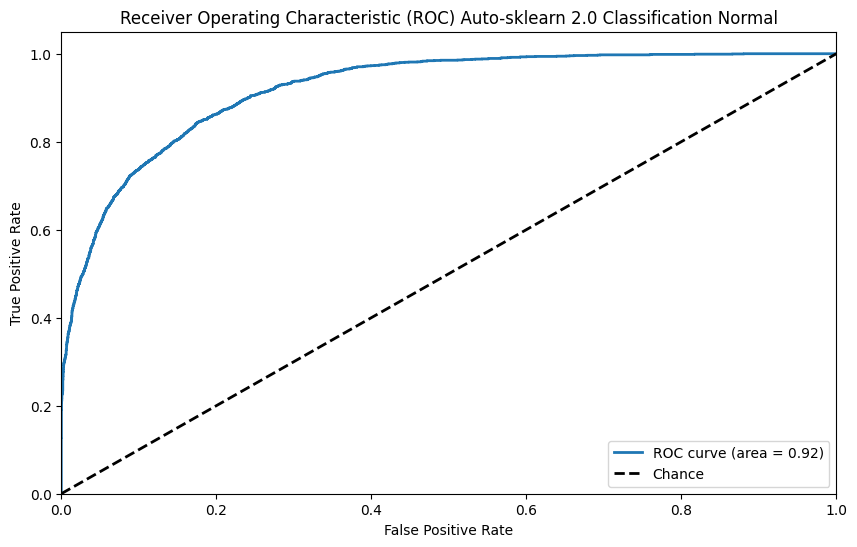

In [16]:
import sklearn.metrics as skm
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred = automl.predict(X_test)

# probabilities for the positive class 1 (>50k)
y_pred_proba = automl.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Chance', lw=2)  # Diagonal line like 'chance' -like guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Auto-sklearn 2.0 Classification Normal')
plt.legend(loc="lower right")

plt.savefig('autosklearn_roc_curve_normal.png', dpi=300)
plt.show()